# Shanghai License Plate Auction Analysis

### UVA CS 4501 Markets, Mechanisms and Machines Spring 2019
Chang Feng, Caroline Zhao, Kathy Wang

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# import the data

license_auction = pd.read_csv("auction.csv")
license_auction['date'] = license_auction.apply(lambda row: datetime((int)(row['year']), (int)(row['month']),1), axis=1)
license_auction['bid_spread'] = license_auction['avg_price']-license_auction['lowest_price']
df_pre2008 = license_auction[license_auction['year']<2008]

df_post2008 = license_auction[license_auction['year']>=2008]


In [3]:
license_auction

,year,month,num_license,lowest_price,avg_price,num_applicants,population,earnings,urban_CPI,date,bid_spread
0,2002,1,1400,13600,14735,3718,1327.730833,21962.50000,98.7,2002-01-01,1135
1,2002,2,1800,13100,14057,4590,1328.321930,22145.51243,99.8,2002-02-01,957
2,2002,3,2000,14300,14662,5190,1328.913289,22330.04989,98.9,2002-03-01,362
3,2002,4,2300,16000,16334,4806,1329.504912,22516.12510,98.3,2002-04-01,334
4,2002,5,2350,17800,18357,4665,1330.096798,22703.75086,98.6,2002-05-01,557
5,2002,6,2800,19600,20178,4502,1330.688948,22892.94010,99.1,2002-06-01,578
6,2002,7,3000,19800,20904,3774,1331.281361,23083.70584,99.0,2002-07-01,1104
7,2002,8,3000,21000,21601,4640,1331.874038,23276.06122,99.2,2002-08-01,601
8,2002,9,3200,23600,24040,4393,1332.466979,23470.01950,99.2,2002-09-01,440
9,2002,10,3200,26400,27040,4661,1333.060184,23665.59401,99.1,2002-10-01,640


## Data Visualization

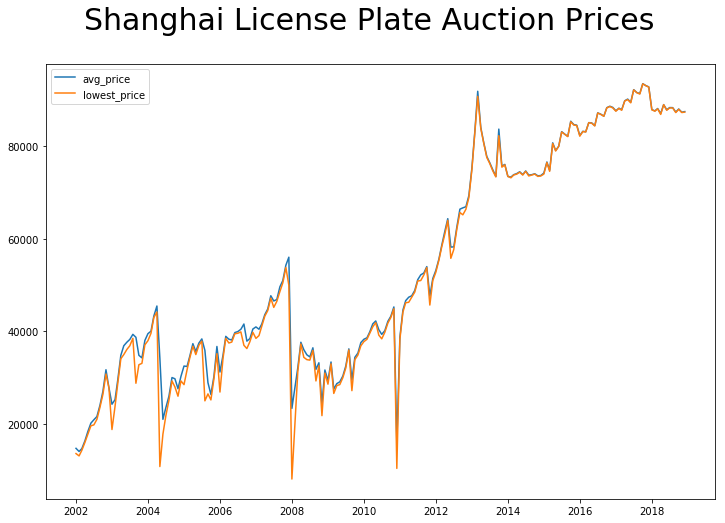

In [42]:
fig1 = plt.figure(figsize=(12,8))
fig1.suptitle('Shanghai License Plate Auction Prices',fontsize=30)
plt.plot(license_auction['date'],license_auction['avg_price'])
plt.plot(license_auction['date'],license_auction['lowest_price'])
plt.legend()

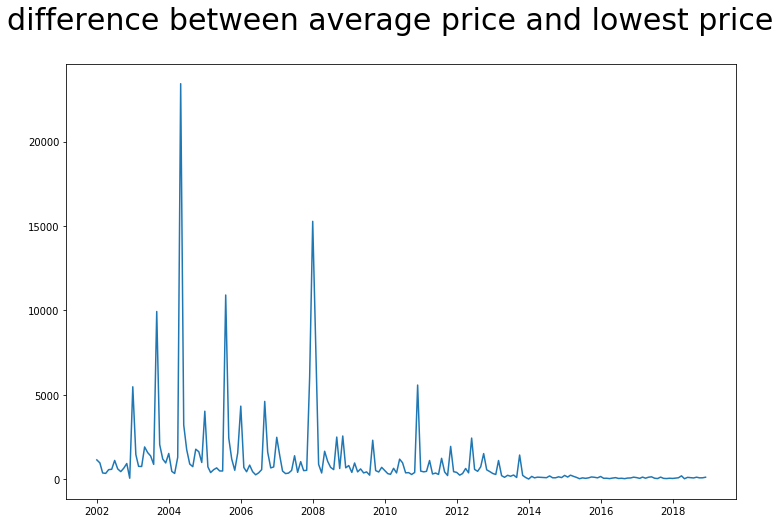

In [43]:

fig2 = plt.figure(figsize=(12,8))
fig2.suptitle('difference between average price and lowest price',fontsize=30)
plt.plot(license_auction['date'],license_auction['avg_price']-license_auction['lowest_price'])

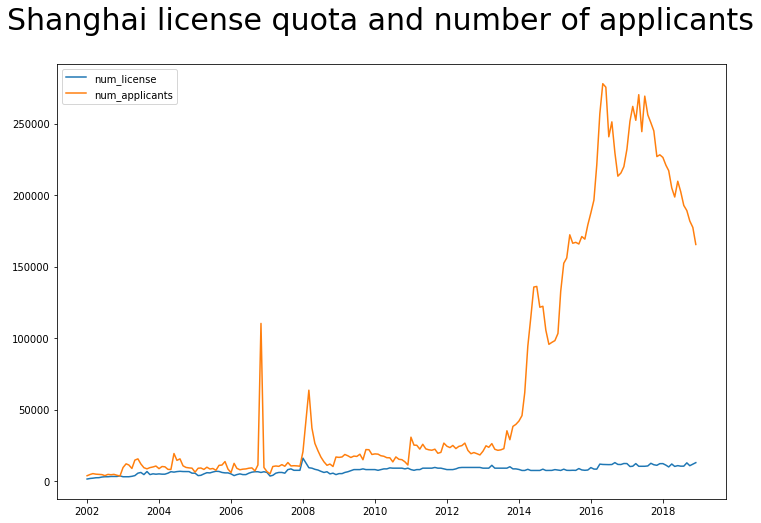

In [44]:
fig3 = plt.figure(figsize=(12,8))
fig3.suptitle('Shanghai license quota and number of applicants',fontsize=30)
plt.plot(license_auction['date'],license_auction['num_license'])
plt.plot(license_auction['date'],license_auction['num_applicants'])
plt.legend()

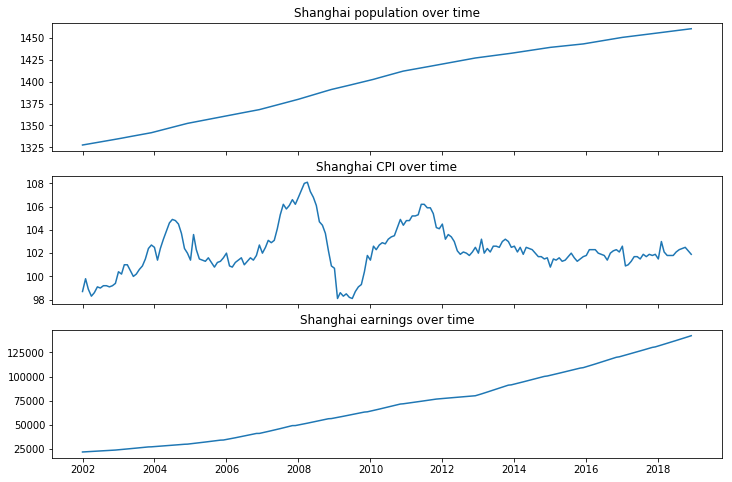

In [46]:
fig4, ax = plt.subplots(3,1,sharex=True,figsize=(12,8))
ax[0,].plot(license_auction['date'],license_auction['population'])
ax[0,].set_title('Shanghai population over time')
ax[1,].plot(license_auction['date'],license_auction['urban_CPI'])
ax[1,].set_title('Shanghai CPI over time')
ax[2,].plot(license_auction['date'],license_auction['earnings'])
ax[2,].set_title('Shanghai earnings over time')
plt.show()


## Prep the data

In [32]:
num_attributes = ["num_license","num_applicants","population","earnings","urban_CPI"]

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attributes),
])

X_test = full_pipeline.fit_transform(df_pre2008)
y_test = df_pre2008["avg_price"].values

X_train = full_pipeline.fit_transform(df_post2008)
y_train = df_post2008["avg_price"].values

X_full = full_pipeline.fit_transform(license_auction)
y_full = license_auction["avg_price"].values

C:\Users\cfeng\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cfeng\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\cfeng\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cfeng\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\cfeng\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

In [30]:
# train different models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

def display_scores(scores):
    print("Scores: ", scores)
    print("mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

## Linear Regression

In [11]:
# linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# cross evaluate linear regression performance
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [26710.00594211  5704.56594493 14274.01612023  7716.55411929
 15331.35923349  6485.72628231  2016.04212046  2823.06483081
  1906.85149621  8644.58822468]
mean:  9161.277431452481
Standard deviation:  7331.326772097133


## Linear SVM

In [24]:
def linsvr_param_selection(X, y, nfolds):
    Cs = [8000,12500,13000,13500]
    gammas = [0.01]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVR(kernel="linear"), param_grid, cv=nfolds, scoring = "neg_mean_squared_error")
    grid_search.fit(X, y)
    
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
        print(np.sqrt(-mean_score),params)
    print(grid_search.best_params_)
    
    return grid_search.best_estimator_

In [25]:
linsvr = linsvr_param_selection(X_train,y_train, 10)
linsvr_scores = cross_val_score(linsvr,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
linsvr_RMSE_scores = np.sqrt(-linsvr_scores)
display_scores(linsvr_RMSE_scores)

10487.812843557893 {'C': 8000, 'gamma': 0.01}
10275.698133040463 {'C': 12500, 'gamma': 0.01}
10278.39070072175 {'C': 13000, 'gamma': 0.01}
10328.39273977063 {'C': 13500, 'gamma': 0.01}
{'C': 12500, 'gamma': 0.01}
Scores:  [17734.86916908  5671.17439926 13627.11266056  7650.72170743
 16792.01217726  8619.6751142   1804.27167739  2807.21021609
  2525.40685054  8667.42338505]
mean:  8589.987735687182
Standard deviation:  5494.987334311571


C:\Users\cfeng\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Gradient Boosting Regression

In [80]:
gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=5, learning_rate=1.0, random_state=42)
gbrt_scores = cross_val_score(gbrt,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
gbrt_RMSE_scores = np.sqrt(-gbrt_scores)
display_scores(gbrt_RMSE_scores)

Scores:  [10648.69498041  3574.38444227 10100.47404152  6687.64547812
  7606.77536948  2537.13860604  3050.08076812  1723.4277539
  3611.37731582  5036.69325076]
mean:  5457.669200643549
Standard deviation:  3000.619945230399


In [81]:
gbrt.fit(X_train, y_train)
license_auction["bgrt_predicted"] = gbrt.predict(X_full)

license_auction["linsvr_predicted"] = linsvr.predict(X_full)

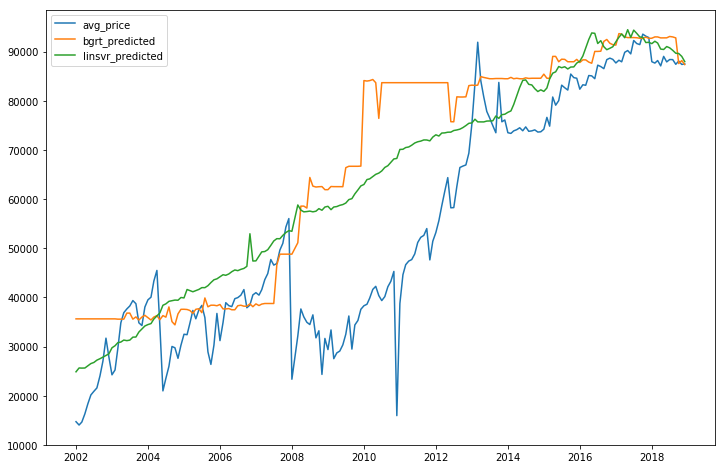

In [82]:
fig5 = plt.figure(figsize=(12,8))
plt.plot(license_auction["date"],license_auction["avg_price"])
plt.plot(license_auction["date"],license_auction["bgrt_predicted"])
plt.plot(license_auction["date"],license_auction["linsvr_predicted"])
plt.legend()